In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math
import pysam as sam #处理fasta文件


## part1 数据清洗

In [ ]:
name = "PGDM1400"
file_route = '/home/dldx/xxy/GP160/data/'+name+".csv"
df = pd.read_csv(file_route)


In [ ]:
# 选取两个符号之间的字符
def txt_wrap_by(start_str, end, html):
        start = html.find(start_str)
        if start >= 0:
            start += len(start_str)
            end = html.find(end, start)
            if end >= 0:
                return html[start:end].strip()
        

In [ ]:
# 清洗IC50为UD的数据
for row in df.index:
    if df.loc[row, name+':IC50: geometric mean']=='UD':
        if df.loc[row, name+':IC50: by study'][0]=='>':
            ic50 = float(txt_wrap_by(">",":",df.loc[row, name+':IC50: by study']))*2
            df.loc[row, name+':IC50: geometric mean'] = ic50
        else:
            ic50 = float(txt_wrap_by("<",":",df.loc[row, name+':IC50: by study']))*2
            df.loc[row, name+':IC50: geometric mean'] = ic50

    


In [ ]:
# 删除IC50值为1的数据
df = df.drop(df[df[name+':IC50: geometric mean']=='1'].index)

In [ ]:
df.index = range(len(df))

In [ ]:
# 保存csv
df.to_csv(file_route)

## part2 抗体-病毒数量统计

In [3]:
path = "./data/antibody"
files = os.listdir(path)
antibody = []
for file in files:
    antibody.append(os.path.splitext(file)[0])
antibody = dict.fromkeys(antibody)


In [11]:
mean = []
std = []
for file in files:
    file_route = path + "/" + file
    df = pd.read_csv(file_route)
    antibody[os.path.splitext(file)[0]] = len(df)
    mean.append(np.array(df["IC50"]).mean())
    std.append(np.array(df["IC50"]).std())
print(antibody)

{'PG9': 810, '10-1074': 865, 'PGT121': 1061, 'b12': 867, '2G12': 906, '3BNC117': 901, 'PGDM1400': 812, '2F5': 884, 'VCR01': 1059, '4E10': 884}


In [13]:
d = {
    "antibody": pd.Series(antibody.keys()),
    "vir_num": pd.Series(antibody.values()),
    "IC50_mean": mean,
    "IC50_std": std
}
df = pd.DataFrame(d)
df.to_csv("./data_process_result/antibody_statistic.csv")

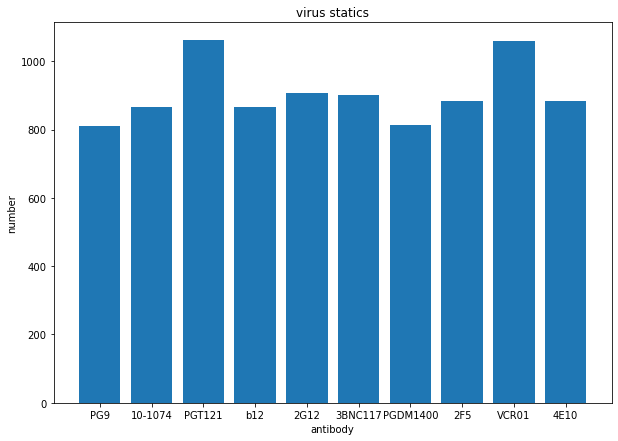

In [37]:
import matplotlib.pyplot as plt

x = np.array(list(antibody.keys()))
y = np.array(list(antibody.values()))
plt.subplots(figsize=(10, 7))
plt.title("virus statics")
plt.xlabel("antibody")
plt.ylabel("number")
plt.bar(x,y)

plt.show()

## Part3. 统计每种抗体对应病毒的地区和亚型

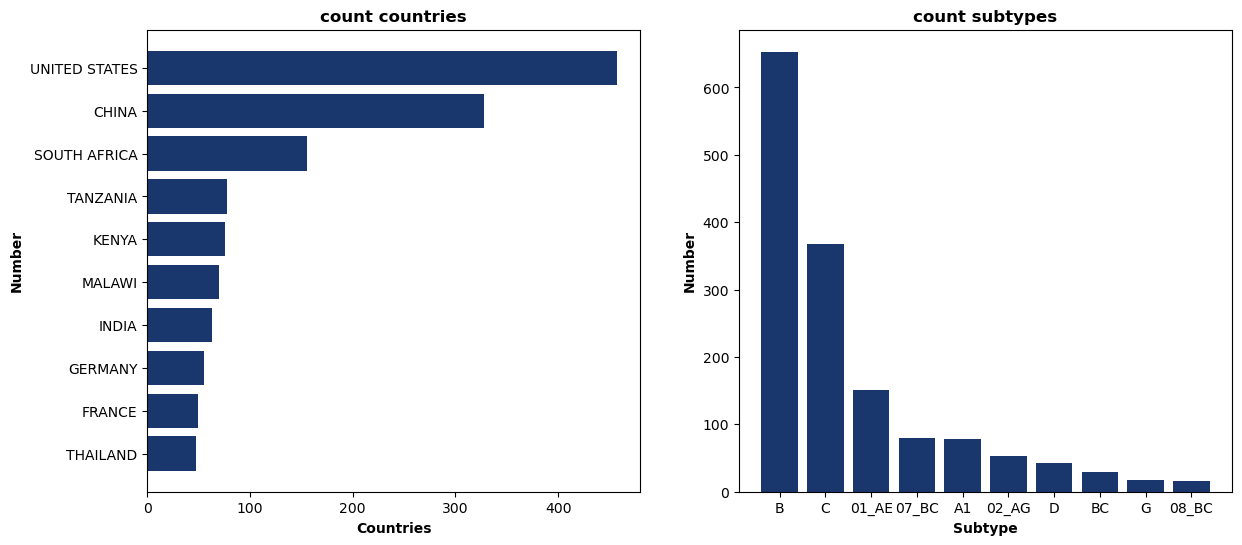

In [62]:
df = pd.read_csv("./data/virus/viruses.csv")
df = df.drop(df[df['Seq data']=='No'].index)

# statistical countries of viruses
country = df["Country"].value_counts()
subtype = df["Subtype"].value_counts()

fig = plt.figure(figsize=(14,6))
# plot1
plt.subplot(1,2,1)
plt.xlabel("Countries", weight = "bold")
plt.ylabel("Number", weight = "bold")
plt.barh(np.array(country.index[:10])[::-1], np.array(country.values[:10])[::-1], color="#19376D")
plt.title("count countries", weight = "bold")

# plot2
plt.subplot(1,2,2)
plt.xlabel("Subtype", weight = "bold")
plt.ylabel("Number", weight = "bold")
plt.bar(subtype.index[:10], subtype.values[:10], color="#19376D")
plt.title("count subtypes", weight = "bold")

plt.show()

In [24]:
path = "./data/processed_data2"
files = os.listdir(path)
dic = {}
for file in files:
    file_route = path + "/" + file
    df = pd.read_csv(file_route)
    # df["IC50"]
    dic[file[:-4]] = pd.Series(np.log(list(df["IC50"])))
    print(file[:-4])
    print("ave:", np.average(list(df["IC50"])))
    print("std:", np.std(list(df["IC50"])))
    print("log_ave:", np.average(np.log(list(df["IC50"]))))
    print("log_std:", np.std(np.log(list(df["IC50"]))))
count_IC50 = pd.DataFrame(dic)



10-1074
ave: 39.58394843131195
std: 48.558514874464265
log_ave: -0.28635284054509647
log_std: 4.286986679652539
PGT121
ave: 38.48513244604317
std: 47.795554543084236
log_ave: -0.007310490329381613
log_std: 4.127434092739814
3BNC117
ave: 13.032088755075188
std: 32.49508196425256
log_ave: -1.3083280296609359
log_std: 2.8062329207040486
2F5
ave: 52.61279363940067
std: 47.24021757108176
log_ave: 2.674963932238939
log_std: 2.2465684850181478
VRC01
ave: 16.246599372056515
std: 35.33932666696252
log_ave: -0.012920763099543396
log_std: 2.411371667529725


In [229]:
count_IC50.to_csv("./data_process_result/IC50_count.csv")

In [33]:
count_IC50 = pd.read_csv("./data_process_result/IC50_count.csv")
count_IC50.drop(count_IC50.columns[0:2], axis=1, inplace=True)
count_IC50.to_csv("./data_process_result/IC50_count.csv")
count_IC50.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PG9       810 non-null    float64
 1   10-1074   865 non-null    float64
 2   PGT121    1061 non-null   float64
 3   b12       867 non-null    float64
 4   2G12      906 non-null    float64
 5   3BNC117   901 non-null    float64
 6   PGDM1400  812 non-null    float64
 7   2F5       884 non-null    float64
 8   VCR01     1059 non-null   float64
 9   4E10      884 non-null    float64
dtypes: float64(10)
memory usage: 83.0 KB


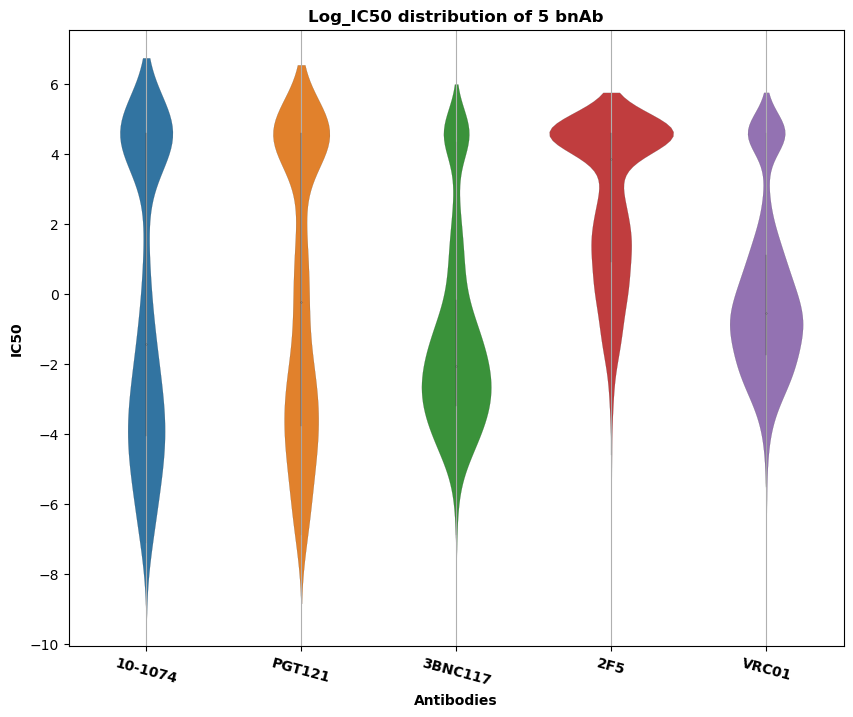

In [14]:
plt.figure(figsize = (10,8))
plt.title("Log_IC50 distribution of 5 bnAb", weight="bold")
plt.xlabel("Antibodies", weight="bold")
plt.ylabel("IC50", weight="bold")
plt.xticks(fontsize=10, rotation=-15, weight="bold")  # 设置x轴刻度字体大小
plt.yticks(fontsize=10)  # 设置y轴刻度字体大小

sns.violinplot(data=count_IC50, linewidth=0.1, width=0.8)
plt.grid(axis='x')
# plt.ylim(-10, 200)
# plt.savefig("./plots/Probability_density_statistics.png")
plt.show()

## Part4. process fasta

In [11]:
fasta = sam.FastaFile('./data/virus/virus_seq.fasta')
path = "./data/antibody"
files = os.listdir(path)

In [12]:

for file in files:
    print(file)
    dic = {}
    seq = []
    ali_seq = []
    virus_name = []
    IC50 = []
    seq_len = []
    ali_seq_len = []
    file_route = path + "/" + file
    df = pd.read_csv(file_route)
    for row in df.index:
        
        Subtype = ""
        Country = ""
        Year = ""
        Virus_name = ""
        Accession = ""
# modify wrong country names
        if df.loc[row, "Country"]=='UNITED STATES':
            df.loc[row, "Country"]='UNITED_STATES'
        if df.loc[row, "Country"]=='SOUTH AFRICA':
            df.loc[row, "Country"]='SOUTH_AFRICA'
        if df.loc[row, "Country"]=="COTE D'IVOIRE":
            df.loc[row, "Country"]="COTE_D'IVOIRE"
        if df.loc[row, "Country"]=="DEM REP OF CONGO":
            df.loc[row, "Country"]="DEM_REP_OF_CONGO"
        if df.loc[row, "Country"]=='TRINIDAD AND TOBAGO':
            df.loc[row, "Country"]='TRINIDAD_AND_TOBAGO'
        if df.loc[row, "Country"]=='UNITED KINGDOM':
            df.loc[row, "Country"]='UNITED_KINGDOM'
        if df.loc[row, "Country"]=='DOMINICAN REPUBLIC':
            df.loc[row, "Country"]='DOMINICAN_REPUBLIC'
        if df.loc[row, "Country"]=='RUSSIAN FEDERATION':
            df.loc[row, "Country"]='RUSSIAN_FEDERATION'
        if df.loc[row, "Virus name"]=='R880F_ENV':
            df.loc[row, "Virus name"]='R880F'





        if not pd.isna(df.loc[row, "Subtype"]):
            Subtype = df.loc[row, "Subtype"]
        if not pd.isna(df.loc[row, "Country"]):
            Country = df.loc[row, "Country"]
        if not pd.isna(df.loc[row, "Year"]):
            Year = int(df.loc[row, "Year"])
        if not pd.isna(df.loc[row, "Virus name"]):
            Virus_name = df.loc[row, "Virus name"]
        if not pd.isna(df.loc[row, "Accession"]):
            Accession = df.loc[row, "Accession"]

        name = str(Subtype) + "." + str(Country) + "." + str(Year) + "." + str(Virus_name) + "." + str(Accession)
        sequence = fasta.fetch(fasta.references[fasta.references.index(name)], 0, 1041).replace("-","").replace("*","").replace("#","")
        ali_sequence = fasta.fetch(fasta.references[fasta.references.index(name)], 0, 1041)
        
        seq.append(sequence)
        ali_seq.append(ali_sequence)
        seq_len.append(len(sequence))
        ali_seq_len.append(len(ali_sequence))
        virus_name.append(str(df.loc[row, "Virus name"]))
        IC50.append(round(df.loc[row, "IC50"], 3))
    
    dic = {"virus_name": virus_name, "sequence": seq, "ali_sequence": ali_seq, "IC50": IC50, "seq_len": seq_len, "ali_seq_len": ali_seq_len}
    antibody_df = pd.DataFrame(dic)
    antibody_df.to_csv("./data/processed_data/"+file)





PG9.csv
10-1074.csv
PGT121.csv
b12.csv
2G12.csv
3BNC117.csv
PGDM1400.csv
2F5.csv
VCR01.csv
4E10.csv


## Part5. 统计病毒长度

In [22]:
path = "./data/processed_data2"
files = os.listdir(path)
dic = {}
for file in files:
    file_route = path+"/"+file
    df = pd.read_csv(file_route)
    # for index in range(len(df)):
    #     df.loc[index, "seq_len"] = len(df.loc[index, "sequence"])
    # df.to_csv(file_route)
    print(file[:-4])
    print("max_len:", np.max(list(df["gp120_len"])))
    print("min_len:", np.min(list(df["gp120_len"])))
    print("ave_len:", np.average(list(df["gp120_len"])))
    dic[file[:-4]] = pd.Series(list(df["gp120_len"]))
    
count_length = pd.DataFrame(dic)



10-1074
max_len: 518
min_len: 451
ave_len: 479.46161321671525
PGT121
max_len: 529
min_len: 434
ave_len: 478.8187050359712
3BNC117
max_len: 518
min_len: 451
ave_len: 479.3825187969925
2F5
max_len: 503
min_len: 427
ave_len: 469.7647058823529
VRC01
max_len: 532
min_len: 437
ave_len: 480.425431711146


In [19]:
count_length.to_csv("./data_process_result/length_count.csv")

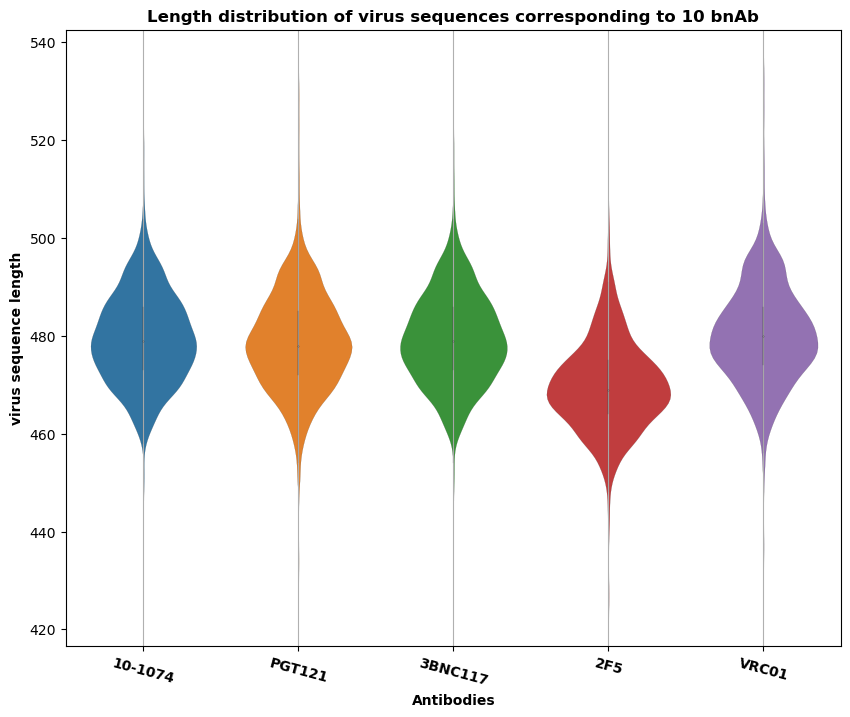

In [18]:
plt.figure(figsize = (10,8))
plt.title("Length distribution of virus sequences corresponding to 10 bnAb", weight="bold")
plt.xlabel("Antibodies", weight="bold")
plt.ylabel("virus sequence length", weight="bold")
plt.xticks(fontsize=10, rotation=-15, weight="bold")  # 设置x轴刻度字体大小
plt.yticks(fontsize=10)  # 设置y轴刻度字体大小

sns.violinplot(data=count_length, linewidth=0.1, width=0.8)
plt.grid(axis='x')
# plt.ylim(-10, 200)
# plt.savefig("./plots/Probability_density_statistics.png")
plt.show()

## Part6. Search v1-v5 GP120 from aa sequences

#### 1. PGT121

In [3]:
fasta = sam.FastaFile('./data/virus/PGT121_aa.fasta')
HXB2_seq = list(fasta.fetch("HXB2",))
HXB2 = pd.DataFrame(data=HXB2_seq, columns=["aa"])

i = 1
for index in range(len(HXB2)):
    if HXB2.loc[index, "aa"].isalpha():
        HXB2.loc[index, "position"] = i
        i +=1
HXB2.to_csv("./data/virus/PGT121_HXB2.csv") 
#v1[160:300] v2[211:286] v3[393:433] v4[505:550] v5[609:618] gp120[51:666]

In [4]:
df = pd.read_csv("./data/antibody/PGT121.csv")
dic = {}
seq = []
ali_seq = [] 
virus_name = []
IC50 = []
seq_len = []
ali_seq_len = []
v1 = []
v2 = []
v3 = []
v4 = []
v5 = []
gp120 = []
gp120_len = []
PGT121_label = []

for row in range(len(df)):
    sequence = fasta.fetch(fasta.references[row+1],).replace("-","").replace("*","").replace("#","")
    ali_sequence = fasta.fetch(fasta.references[row+1],)
    gp120_seq = ali_sequence[51:666].replace("-","").replace("*","").replace("#","")
    seq.append(sequence)
    # ali_seq.append(ali_sequence)
    seq_len.append(len(sequence))
    gp120_len.append(len(gp120_seq))
    # ali_seq_len.append(len(ali_sequence))
    virus_name.append(str(df.loc[row, "Virus name"]))
    IC50.append(round(df.loc[row, "IC50"], 4))
    if df.loc[row, "IC50"] < 1: # 定义为敏感
        PGT121_label.append(0)
    elif df.loc[row, "IC50"] > 25: # 定义为逃逸
        PGT121_label.append(1)
    else:
        PGT121_label.append(2)
    v1.append(ali_sequence[160:300].replace("-","").replace("*","").replace("#",""))
    v2.append(ali_sequence[211:286].replace("-","").replace("*","").replace("#",""))
    v3.append(ali_sequence[393:433].replace("-","").replace("*","").replace("#",""))
    v4.append(ali_sequence[505:550].replace("-","").replace("*","").replace("#",""))
    v5.append(ali_sequence[609:618].replace("-","").replace("*","").replace("#",""))
    gp120.append(gp120_seq)
dic = {"virus_name": virus_name, "sequence": seq, "v1":v1, "v2":v2, "v3":v3, "v4":v4, "v5": v5, "gp120": gp120, "seq_len": seq_len,"gp120_len": gp120_len, "IC50": IC50, "PGT121_label": PGT121_label}
antibody_df = pd.DataFrame(dic)
antibody_df["Subtype"] = df["Subtype"]
antibody_df["Country"] = df["Country"]
antibody_df["Year"] = df["Year"]
antibody_df["Accession"] = df["Accession"]
antibody_df.to_csv("./data/processed_data2/PGT121.csv")

#### 2. VRC01

In [3]:
fasta = sam.FastaFile('./data/virus/VRC01_aa.fasta')
HXB2_seq = list(fasta.fetch("HXB2",))
HXB2 = pd.DataFrame(data=HXB2_seq, columns=["aa"])

i = 1
for index in range(len(HXB2)):
    if HXB2.loc[index, "aa"].isalpha():
        HXB2.loc[index, "position"] = i
        i +=1
HXB2.to_csv("./data/virus/VRC01_HXB2.csv") 
#v1[157:207] v2[208:282] v3[389:429] v4[500:546] v5[604:614] gp120[48:661]

In [4]:
df = pd.read_csv("./data/antibody/VRC01.csv")
dic = {}
seq = []
ali_seq = [] 
virus_name = []
IC50 = []
seq_len = []
ali_seq_len = []
v1 = []
v2 = []
v3 = []
v4 = []
v5 = []
gp120 = []
gp120_len = []
PGT121_label = []

for row in range(len(df)):
    sequence = fasta.fetch(fasta.references[row+1],).replace("-","").replace("*","").replace("#","")
    ali_sequence = fasta.fetch(fasta.references[row+1],)
    gp120_seq = ali_sequence[51:666].replace("-","").replace("*","").replace("#","")
    seq.append(sequence)
    # ali_seq.append(ali_sequence)
    seq_len.append(len(sequence))
    gp120_len.append(len(gp120_seq))
    # ali_seq_len.append(len(ali_sequence))
    virus_name.append(str(df.loc[row, "Virus name"]))
    IC50.append(df.loc[row, "IC50"])
    if df.loc[row, "IC50"] < 1: # 定义为敏感
        PGT121_label.append(0)
    elif df.loc[row, "IC50"] > 25: # 定义为逃逸
        PGT121_label.append(1)
    else:
        PGT121_label.append(2)
    v1.append(ali_sequence[160:300].replace("-","").replace("*","").replace("#",""))
    v2.append(ali_sequence[211:286].replace("-","").replace("*","").replace("#",""))
    v3.append(ali_sequence[393:433].replace("-","").replace("*","").replace("#",""))
    v4.append(ali_sequence[505:550].replace("-","").replace("*","").replace("#",""))
    v5.append(ali_sequence[604:614].replace("-","").replace("*","").replace("#",""))
    gp120.append(gp120_seq)
dic = {"virus_name": virus_name, "sequence": seq, "v1":v1, "v2":v2, "v3":v3, "v4":v4, "v5": v5, "gp120": gp120, "seq_len": seq_len,"gp120_len": gp120_len, "IC50": IC50, "PGT121_label": PGT121_label}
antibody_df = pd.DataFrame(dic)
antibody_df["Subtype"] = df["Subtype"]
antibody_df["Country"] = df["Country"]
antibody_df["Year"] = df["Year"]
antibody_df["Accession"] = df["Accession"]

antibody_df.to_csv("./data/processed_data2/VRC01.csv")

#### 3. 3BNC117

In [7]:
fasta = sam.FastaFile('./data/virus/3BNC117_aa.fasta')
HXB2_seq = list(fasta.fetch("HXB2",))
HXB2 = pd.DataFrame(data=HXB2_seq, columns=["aa"])

i = 1
for index in range(len(HXB2)):
    if HXB2.loc[index, "aa"].isalpha():
        HXB2.loc[index, "position"] = i
        i +=1
HXB2.to_csv("./data/virus/3BNC117_HXB2.csv") 
#v1[157:207] v2[208:281] v3[387:425] v4[495:540] v5[598:608] gp120[48:654]

In [8]:
df = pd.read_csv("./data/antibody/3BNC117.csv")
dic = {}
seq = []
ali_seq = [] 
virus_name = []
IC50 = []
seq_len = []
ali_seq_len = []
v1 = []
v2 = []
v3 = []
v4 = []
v5= []
gp120 = []
gp120_len = []
PGT121_label = []

for row in range(len(df)):
    sequence = fasta.fetch(fasta.references[row+1],).replace("-","").replace("*","").replace("#","")
    ali_sequence = fasta.fetch(fasta.references[row+1],)
    gp120_seq = ali_sequence[48:654].replace("-","").replace("*","").replace("#","")
    seq.append(sequence)
    seq_len.append(len(sequence))
    gp120_len.append(len(gp120_seq))
    virus_name.append(str(df.loc[row, "Virus name"]))
    IC50.append(df.loc[row, "IC50"])
    if df.loc[row, "IC50"] < 1: # 定义为敏感
        PGT121_label.append(0)
    elif df.loc[row, "IC50"] > 25: # 定义为逃逸
        PGT121_label.append(1)
    else:
        PGT121_label.append(2)
    v1.append(ali_sequence[157:207].replace("-","").replace("*","").replace("#",""))
    v2.append(ali_sequence[208:281].replace("-","").replace("*","").replace("#",""))
    v3.append(ali_sequence[387:425].replace("-","").replace("*","").replace("#",""))
    v4.append(ali_sequence[495:540].replace("-","").replace("*","").replace("#",""))
    v5.append(ali_sequence[598:608].replace("-","").replace("*","").replace("#",""))
    gp120.append(gp120_seq)
dic = {"virus_name": virus_name, "sequence": seq, "v1":v1, "v2":v2, "v3":v3, "v4":v4, "v5":v5, "gp120": gp120, "seq_len": seq_len,"gp120_len": gp120_len, "IC50": IC50, "3BNC117_label": PGT121_label}
antibody_df = pd.DataFrame(dic)
antibody_df["Subtype"] = df["Subtype"]
antibody_df["Country"] = df["Country"]
antibody_df["Year"] = df["Year"]
antibody_df["Accession"] = df["Accession"]

antibody_df.to_csv("./data/processed_data2/3BNC117.csv")

#### 4. 10-1074

In [33]:
fasta = sam.FastaFile('./data/virus/10-1074_aa.fasta')
HXB2_seq = list(fasta.fetch("HXB2",))
HXB2 = pd.DataFrame(data=HXB2_seq, columns=["aa"])

i = 1
for index in range(len(HXB2)):
    if HXB2.loc[index, "aa"].isalpha():
        HXB2.loc[index, "position"] = i
        i +=1
HXB2.to_csv("./data/virus/10-1074_HXB2.csv") 
#v1[157:207] v2[208:281] v3[387:425] v4[495:540] v5[598:608] gp120[48:654]

In [9]:
df = pd.read_csv("./data/antibody/10-1074.csv")
dic = {}
seq = []
ali_seq = [] 
virus_name = []
IC50 = []
seq_len = []
ali_seq_len = []
v1 = []
v2 = []
v3 = []
v4 = []
v5= []
gp120 = []
gp120_len = []
label = []

for row in range(len(df)):
    sequence = fasta.fetch(fasta.references[row+1],).replace("-","").replace("*","").replace("#","")
    ali_sequence = fasta.fetch(fasta.references[row+1],)
    gp120_seq = ali_sequence[48:654].replace("-","").replace("*","").replace("#","")
    seq.append(sequence)
    seq_len.append(len(sequence))
    gp120_len.append(len(gp120_seq))
    virus_name.append(str(df.loc[row, "Virus name"]))
    IC50.append(df.loc[row, "IC50"])
    if df.loc[row, "IC50"] < 1: # 定义为敏感
        label.append(0)
    elif df.loc[row, "IC50"] > 25: # 定义为逃逸
        label.append(1)
    else:
        label.append(2)
    v1.append(ali_sequence[157:207].replace("-","").replace("*","").replace("#",""))
    v2.append(ali_sequence[208:281].replace("-","").replace("*","").replace("#",""))
    v3.append(ali_sequence[387:425].replace("-","").replace("*","").replace("#",""))
    v4.append(ali_sequence[495:540].replace("-","").replace("*","").replace("#",""))
    v5.append(ali_sequence[598:608].replace("-","").replace("*","").replace("#",""))
    gp120.append(gp120_seq)
dic = {"virus_name": virus_name, "sequence": seq, "v1":v1, "v2":v2, "v3":v3, "v4":v4, "v5":v5, "gp120": gp120, "seq_len": seq_len,"gp120_len": gp120_len, "IC50": IC50, "10-1074_label": label}
antibody_df = pd.DataFrame(dic)
antibody_df["Subtype"] = df["Subtype"]
antibody_df["Country"] = df["Country"]
antibody_df["Year"] = df["Year"]
antibody_df["Accession"] = df["Accession"]

antibody_df.to_csv("./data/processed_data2/10-1074.csv")

#### 5. 2F5

In [10]:
fasta = sam.FastaFile('./data/virus/2F5_aa.fasta')
HXB2_seq = list(fasta.fetch("HXB2",))
HXB2 = pd.DataFrame(data=HXB2_seq, columns=["aa"])

i = 1
for index in range(len(HXB2)):
    if HXB2.loc[index, "aa"].isalpha():
        HXB2.loc[index, "position"] = i
        i +=1
HXB2.to_csv("./data/virus/2F5_HXB2.csv") 
#v1[157:207] v2[208:273] v3[385:426] v4[502:547] v5[608:618] gp120[47:667]

In [11]:
df = pd.read_csv("./data/antibody/2F5.csv")
dic = {}
seq = []
ali_seq = [] 
virus_name = []
IC50 = []
seq_len = []
ali_seq_len = []
v1 = []
v2 = []
v3 = []
v4 = []
v5= []
gp120 = []
gp120_len = []
label = []

for row in range(len(df)):
    sequence = fasta.fetch(fasta.references[row+1],).replace("-","").replace("*","").replace("#","")
    ali_sequence = fasta.fetch(fasta.references[row+1],)
    gp120_seq = ali_sequence[48:654].replace("-","").replace("*","").replace("#","")
    seq.append(sequence)
    seq_len.append(len(sequence))
    gp120_len.append(len(gp120_seq))
    virus_name.append(str(df.loc[row, "Virus name"]))
    IC50.append(df.loc[row, "IC50"])
    if df.loc[row, "IC50"] < 1: # 定义为敏感
        label.append(0)
    elif df.loc[row, "IC50"] > 25: # 定义为逃逸
        label.append(1)
    else:
        label.append(2)
    v1.append(ali_sequence[157:207].replace("-","").replace("*","").replace("#",""))
    v2.append(ali_sequence[208:281].replace("-","").replace("*","").replace("#",""))
    v3.append(ali_sequence[387:425].replace("-","").replace("*","").replace("#",""))
    v4.append(ali_sequence[495:540].replace("-","").replace("*","").replace("#",""))
    v5.append(ali_sequence[598:608].replace("-","").replace("*","").replace("#",""))
    gp120.append(gp120_seq)
dic = {"virus_name": virus_name, "sequence": seq, "v1":v1, "v2":v2, "v3":v3, "v4":v4, "v5":v5, "gp120": gp120, "seq_len": seq_len,"gp120_len": gp120_len, "IC50": IC50, "2F5_label": label}
antibody_df = pd.DataFrame(dic)
antibody_df["Subtype"] = df["Subtype"]
antibody_df["Country"] = df["Country"]
antibody_df["Year"] = df["Year"]
antibody_df["Accession"] = df["Accession"]

antibody_df.to_csv("./data/processed_data2/2F5.csv")

## Part7. Merge five antibody csv files 

In [21]:
file1 = pd.read_csv("./data/processed_data2/PGT121.csv")
file2 = pd.read_csv("./data/processed_data2/VRC01.csv")
file3 = pd.read_csv("./data/processed_data2/3BNC117.csv")
file4 = pd.read_csv("./data/processed_data2/10-1074.csv")
file5 = pd.read_csv("./data/processed_data2/2F5.csv")

In [22]:
for index1 in range(len(file1)):
    virus_name = file1.loc[index1, "virus_name"]
    index2 = file2[file2["virus_name"] == virus_name].index
    index3 = file3[file3["virus_name"] == virus_name].index
    index4 = file4[file4["virus_name"] == virus_name].index
    index5 = file5[file5["virus_name"] == virus_name].index

    if len(index2) > 0:
        index2 = index2[0]
        file1.loc[index1, "VRC01_IC50"] = file2.loc[index2, "IC50"]
        file1.loc[index1, "VRC01_label"] = file2.loc[index2, "label"]
    if len(index3) > 0:
        index3 = index3[0]
        file1.loc[index1, "3BNC117_IC50"] = file3.loc[index3, "IC50"]
        file1.loc[index1, "3BNC117_label"] = file3.loc[index3, "label"]
    if len(index4) > 0:
        index4 = index4[0]
        file1.loc[index1, "10-1074_IC50"] = file4.loc[index4, "IC50"]
        file1.loc[index1, "10-1074_label"] = file4.loc[index4, "label"]
    if len(index5) > 0:
        index5 = index5[0]
        file1.loc[index1, "2F5_IC50"] = file5.loc[index5, "IC50"]
        file1.loc[index1, "2F5_label"] = file5.loc[index5, "label"]

# file1 = file1.sort_values(by=["PGT121_label", "VRC01_label", "3BNC117_label", "10-1074_label", "2F5_label"],
#                           ascending=[True,True,True,True,True])
                          


In [39]:
# drop lines whose label_column == NA
file1.dropna(subset=["PGT121_label", "VRC01_label", "3BNC117_label", "10-1074_label", "2F5_label"], inplace = True)

In [23]:
file = file1

In [25]:
for index2 in range(len(file2)):
    virus_name = file2.loc[index2, "virus_name"]
    index = file[file["virus_name"]== virus_name].index

    if len(index) > 0:
        index = index[0]
        file.loc[index, "VRC01_IC50"] = file2.loc[index2, "IC50"]
        file.loc[index, "VRC01_label"] = file2.loc[index2, "label"]

    else:
        data = {"virus_name": virus_name,
                "sequence": file2.loc[index2, "sequence"],
                "v1": file2.loc[index2, "v1"],
                "v2": file2.loc[index2, "v2"],
                "v3": file2.loc[index2, "v3"],
                "v4": file2.loc[index2, "v4"],
                "v5": file2.loc[index2, "v5"],
                "gp120": file2.loc[index2, "gp120"],
                "seq_len": file2.loc[index2, "seq_len"],
                "gp120_len": file2.loc[index2, "gp120_len"],
                "Subtype": file2.loc[index2, "Subtype"],
                "Country": file2.loc[index2, "Country"],
                "Year": file2.loc[index2, "Year"],
                "Accession": file2.loc[index2, "Accession"],
                "VRC01_IC50": file2.loc[index2, "IC50"],
                "VRC01_label": file2.loc[index2, "label"]
                }
        data = pd.Series(data)
        file = file._append(data, ignore_index = True)

    

In [27]:
for index2 in range(len(file3)):
    virus_name = file3.loc[index2, "virus_name"]
    index = file[file["virus_name"]== virus_name].index

    if len(index) > 0:
        index = index[0]
        file.loc[index, "3BNC117_IC50"] = file3.loc[index2, "IC50"]
        file.loc[index, "3BNC117_label"] = file3.loc[index2, "label"]

    else:
        data = {"virus_name": virus_name,
                "sequence": file3.loc[index2, "sequence"],
                "v1": file3.loc[index2, "v1"],
                "v2": file3.loc[index2, "v2"],
                "v3": file3.loc[index2, "v3"],
                "v4": file3.loc[index2, "v4"],
                "v5": file3.loc[index2, "v5"],
                "gp120": file3.loc[index2, "gp120"],
                "seq_len": file3.loc[index2, "seq_len"],
                "gp120_len": file3.loc[index2, "gp120_len"],
                "Subtype": file3.loc[index2, "Subtype"],
                "Country": file3.loc[index2, "Country"],
                "Year": file3.loc[index2, "Year"],
                "Accession": file3.loc[index2, "Accession"],
                "3BNC117_IC50": file3.loc[index2, "IC50"],
                "3BNC117_label": file3.loc[index2, "label"]
                }
        data = pd.Series(data)
        file = file._append(data, ignore_index = True)

In [29]:
for index2 in range(len(file4)):
    virus_name = file4.loc[index2, "virus_name"]
    index = file[file["virus_name"]== virus_name].index

    if len(index) > 0:
        index = index[0]
        file.loc[index, "10-1074_IC50"] = file4.loc[index2, "IC50"]
        file.loc[index, "10-1074_label"] = file4.loc[index2, "label"]

    else:
        data = {"virus_name": virus_name,
                "sequence": file4.loc[index2, "sequence"],
                "v1": file4.loc[index2, "v1"],
                "v2": file4.loc[index2, "v2"],
                "v3": file4.loc[index2, "v3"],
                "v4": file4.loc[index2, "v4"],
                "v5": file4.loc[index2, "v5"],
                "gp120": file4.loc[index2, "gp120"],
                "seq_len": file4.loc[index2, "seq_len"],
                "gp120_len": file4.loc[index2, "gp120_len"],
                "Subtype": file4.loc[index2, "Subtype"],
                "Country": file4.loc[index2, "Country"],
                "Year": file4.loc[index2, "Year"],
                "Accession": file4.loc[index2, "Accession"],
                "10-1074_IC50": file4.loc[index2, "IC50"],
                "10-1074_label": file4.loc[index2, "label"]
                }
        data = pd.Series(data)
        file = file._append(data, ignore_index = True)

In [31]:
for index2 in range(len(file5)):
    virus_name = file5.loc[index2, "virus_name"]
    index = file[file["virus_name"]== virus_name].index

    if len(index) > 0:
        index = index[0]
        file.loc[index, "2F5_IC50"] = file5.loc[index2, "IC50"]
        file.loc[index, "2F5_label"] = file5.loc[index2, "label"]

    else:
        data = {"virus_name": virus_name,
                "sequence": file5.loc[index2, "sequence"],
                "v1": file5.loc[index2, "v1"],
                "v2": file5.loc[index2, "v2"],
                "v3": file5.loc[index2, "v3"],
                "v4": file5.loc[index2, "v4"],
                "v5": file5.loc[index2, "v5"],
                "gp120": file5.loc[index2, "gp120"],
                "seq_len": file5.loc[index2, "seq_len"],
                "gp120_len": file5.loc[index2, "gp120_len"],
                "Subtype": file5.loc[index2, "Subtype"],
                "Country": file5.loc[index2, "Country"],
                "Year": file5.loc[index2, "Year"],
                "Accession": file5.loc[index2, "Accession"],
                "2F5_IC50": file5.loc[index2, "IC50"],
                "2F5_label": file5.loc[index2, "label"]
                }
        data = pd.Series(data)
        file = file._append(data, ignore_index = True)

In [37]:
file = file[file["VRC01_label"] != 2]
file = file[file["PGT121_label"] != 2]
file = file[file["3BNC117_label"] != 2]
file = file[file["10-1074_label"] != 2]
file = file[file["2F5_label"] != 2]



In [40]:
# drop lines whose label_column == NA
file.dropna(subset=["PGT121_label", "VRC01_label", "3BNC117_label", "10-1074_label", "2F5_label"], inplace = True)

In [44]:
file= pd.read_csv("./data/antibody/merge2.csv")
file

,Unnamed: 0.1,Unnamed: 0,virus_name,sequence,v1,v2,v3,v4,v5,gp120,...,Year,Accession,VRC01_IC50,VRC01_label,3BNC117_IC50,3BNC117_label,10-1074_IC50,10-1074_label,2F5_IC50,2F5_label
0,1,1.0,001428_2_42,MRVRGILRNYQQWWMWGVLGFWMLMICNGVENLWVTVYYGVPVWKE...,TQVNATQGNTTQVNVTQVNGDEMKNCSFNTTTEIRDKKQKAYALFY...,SFNTTTEIRDKKQKAYALFYRLDLVPLERENRGDSNSASKYILIN,RPNNNTRKSIRIGPGQTFYATGDIIGNIREAHC,NTSGLFNSTYMPNGTYMPNGTNNSNSTIILP,KNNNTEIF,VENLWVTVYYGVPVWKEARTTLFCASDAKAYETEVHNVWATHACVP...,...,2000.0,EF117266,0.0189,0.0,0.010762,0.0,0.024359,0.0,100.0000,1.0
1,4,4.0,00836_2_5,MRVRGIRRNYQHWWIWGILGFWMLMICKGGREDLWVTVYYGVPVWK...,TNVNIINGTIHNETYESMKNCSFNTTTELKDKKQSVYALFYRLDIV...,SFNTTTELKDKKQSVYALFYRLDIVPLNNSNEYYRLIN,RPNNNTRKSIRIGPGQTFYATGEIIGNIRQAHC,NTSSLFKGTYRPNGTSNSTSGSIITLP,EEANTTETF,GREDLWVTVYYGVPVWKEAKTTLFCASDAKAHEREVHNVWATYACV...,...,2000.0,EF117265,0.1642,0.0,76.797700,1.0,100.000000,1.0,100.0000,1.0
2,6,6.0,0260_V5_C36,MRVMGIQRNSQCFLSWGMLVLGIMMICSAVGNLWVTVYYGVPVWKD...,TDYKGNYTNYNYTKNNGTGHNITSDMEGEIKDCSFNVTTELRDKRQ...,SFNVTTELRDKRQKVHSLFYRLDIVQINSSQTNSSEYRLIN,RPNNNTRTSVRIGPGQTFYATGAITGDIRQAHC,NTSGLFNSTWNDTSNHNTSGTESNANITLQ,NNNTTTETF,VGNLWVTVYYGVPVWKDAETTLFCASDAKAYDKEVHNVWATHACVP...,...,2005.0,HM215256,0.5680,0.0,0.180960,0.0,0.149140,0.0,86.9148,1.0
3,8,8.0,036_BT_SGA4,MRVRETLRNYQQWWTWGILGFWMLMIYSVAGNEKKLWVTVYYGVPV...,TNVTVSNETWNDDIVRNCSFNATTERKDKKKQVYALFYKLDIVPLN...,SFNATTERKDKKKQVYALFYKLDIVPLNESSSSENSTSIKYRLIS,RPNNNTRKSIRIGPGQAFYATGEIIGDIRQAHC,NTTQLFNSTYMNNGTGNDSIITLQ,NGTETF,AGNEKKLWVTVYYGVPVWREAKTTLFCASDAKAYEKEVHNVWATHA...,...,2015.0,OP121250,0.7790,0.0,0.106000,0.0,0.021000,0.0,NaN,NaN
4,9,9.0,036_TF_SGA1,MRVREILRNYQQWWTWGILGFWMLMIYNVAGNEKKLWVTVYYGVPV...,TNVTMSNATMYDDIVRNCSFNATTERKDKKKQVYALFYKLDIVPLN...,SFNATTERKDKKKQVYALFYKLDIVPLNESSSSENSNSSKYRLIS,RPNNNTRKSIRIGPGQAFYATGEIIGDIRQAYC,NTTQLFKGTYNSTYMNNGTGNNSTITLP,DDIETF,AGNEKKLWVTVYYGVPVWREAKTTLFCASDAKAYEKEVHNVWATHA...,...,2013.0,OP121252,0.2300,0.0,0.070000,0.0,0.003000,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,1693,NaN,W61D_TCLA_71,MKVKETRKNYQHLWRWGTMLLGMLMICSAAEQLWVTVYYGVPVWKE...,DDVNTTNSTTTTSNGWTGEIRKGEIKN,SFNITTSIRDKVQKEYALFYNLDVVPIDDDNATTKNKTTRNFRLIH...,NNNTRKGIHIGPGRAFYAARKIIGDIRQAH,FFYCDTTQLFNSTWNGTEGNNTEG,TEGN,EQLWVTVYYGVPVWKEATTTLFCASDAKAYDTEVHNVWATHACVPT...,...,NaN,HM215359,NaN,NaN,NaN,NaN,NaN,NaN,0.0100,0.0
993,1694,NaN,X2348_C2_8,MRVTEIKKSYRHLWWRWGTMLLGMLMIYSAAEQAAEPLWVTVYYGV...,TDDLRNDTNNSTANIVEKGEIKN,SFNITTGMSKVQKEHALFYSLDVVPMNASNTQYRLISCNTSVITR,NNNTRKGIHMGSGRAFYTTGDIIGDIRKAH,FFYCNTTQLFNSSWNVNKTVNDTE,NaN,EQAAEPLWVTVYYGVPVWKEATTTLFCASDAKAQSTEAHNIWATHA...,...,2008.0,FJ817365,NaN,NaN,NaN,NaN,NaN,NaN,100.0000,1.0
994,1698,NaN,X2687_F3,MRVREMRRSWPPWGKWGLLFLGILIICKAENLWVTIYYGVPVWKEA...,VNYNATNATNGFNNSTLKEESGAIQN,SFNITTEVRDKHQKVFALFYKLDIVSINNRNEYRLINCNTSTITQ,NNNTRKSIPMGPGKAFYTTGEIIGDIRKAH,FFYCNTSKLFNETEFSNTQ,QH,ENLWVTIYYGVPVWKEATTTLFCASDAKAYDEEVHNVWATHACVPT...,...,2009.0,HM068551,NaN,NaN,NaN,NaN,NaN,NaN,100.0000,1.0
995,1699,NaN,X558_8_B12_6,MKARGTQRNWPSLWKWGILILGLVIICNASNNLWVTVYYGVPVWED...,TNVNKTVTNGTETVANNTFAELKN,SFNITTAMQDKKKQEYALFYKLDIVPINDNDNNNNSARDYRLINCN...,SNNTRKSIRFGPGQAFYATGDITGDIRQAY,FFYCNTSELFNSSLINSNLSNSGNGANNG,NaN,NNLWVTVYYGVPVWEDADTTLFCASDAKAYSTESHNVWATHACVPT...,...,2006.0,GQ222684,NaN,NaN,NaN,NaN,NaN,NaN,31.7500,1.0


In [42]:
file.to_csv("./data/antibody/merge3_5label.csv")